/tmp/ipykernel_180496/1223427631.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loss_data['next_relative_time'].fillna(loss_data['relative_time'].max(), inplace=True)  # Fill last value


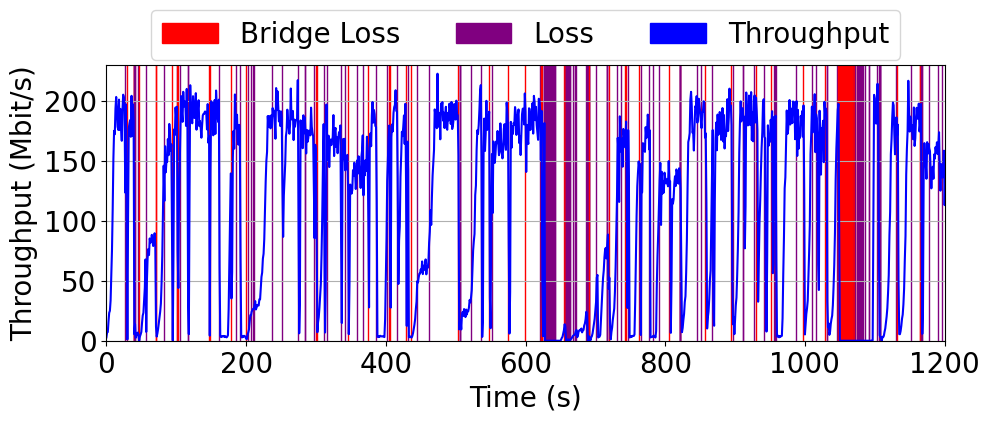

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the CSV
data1 = pd.read_csv('Data/Emulation/output_47G_00.csv',header=None, names=['timestamp', 'length'])
data1['timestamp'] = pd.to_datetime(data1['timestamp'], unit='s')
data1.set_index('timestamp', inplace=True)
data1 = data1.resample('1s').sum()  # Resample to aggregate data

# Calculate throughput in Mbps for the first dataset
data1['throughput_mbps'] = (data1['length'] * 8) / 1e6



# Calculate throughput in Mbps for the second dataset
data2['throughput_mbps'] = (data2['length'] * 8) / 1e6

# Create a relative time index for the first dataset
data1['relative_time'] = (data1.index - data1.index[0]).total_seconds()

# Create a relative time index for the second dataset, adjusted to start from 0
data2['relative_time'] = (data2.index - data2.index[0]).total_seconds()

# Filter out negative relative times in the second dataset
data2 = data2[data2['relative_time'] >= 0]

loss_data = pd.read_csv('Data/Emulation/loss_time_bridge_trace.csv')
loss_data['relative_time'] = loss_data['relative_time'].astype(float)

# Compute next relative time
loss_data['next_relative_time'] = loss_data['relative_time'].shift(-1)
loss_data['next_relative_time'].fillna(loss_data['relative_time'].max(), inplace=True)  # Fill last value
loss_data['end_time'] = loss_data['next_relative_time']


# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 4.5))
fzsize = 20

for index, row in loss_data.iterrows():
    if row['lost']:
        color = 'purple'  # Default color
        if row.get('bridge', False):  # Check if bridge is True
            color = 'red'  # Light purple if bridge is True
        plt.axvspan(row['relative_time'], row['end_time'], color=color)

# Plot both datasets
plt.plot(data1['relative_time'], data1['throughput_mbps'], label='With Loss', color='blue')


red_patch = mpatches.Patch(color='red', label='Bridge Loss')
purple_patch = mpatches.Patch(color='purple', label='Loss')
blue_patch = mpatches.Patch(color='blue', label='Throughput')

# Adding labels and title
plt.ylim(0, 230)
plt.xlim(0, 1200)
plt.yticks([0,50,100,150,200])
plt.xlabel('Time (s)', size=fzsize)
plt.ylabel('Throughput (Mbit/s)', size=fzsize)
plt.legend(handles=[red_patch,purple_patch, blue_patch],loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=fzsize)
plt.grid(axis='y')
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.tight_layout()
# Save the figure as a PDF
plt.savefig('throughput_emu_loss.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_180496/3960543139.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loss_data['next_relative_time'].fillna(loss_data['relative_time'].max(), inplace=True)  # Fill last value


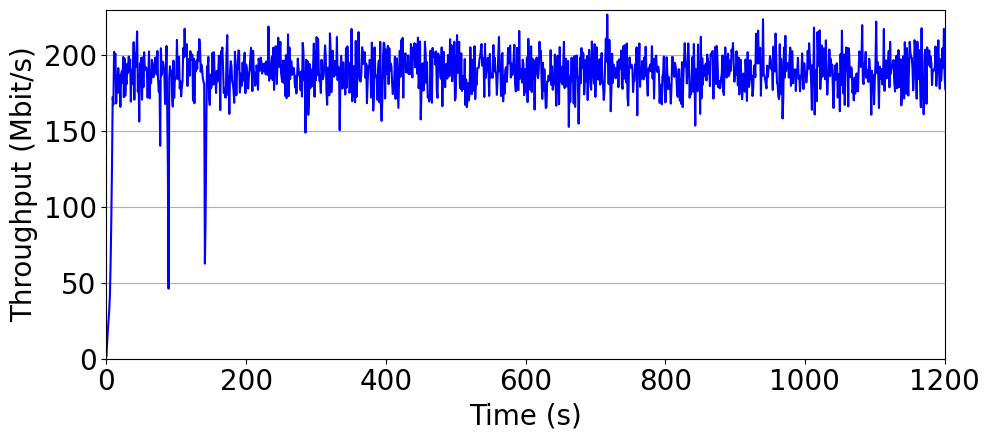

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
data1 = pd.read_csv('Data/Emulation/output_47G_01.csv',header=None, names=['timestamp', 'length'])
data1['timestamp'] = pd.to_datetime(data1['timestamp'], unit='s')
data1.set_index('timestamp', inplace=True)
data1 = data1.resample('1s').sum()  # Resample to aggregate data

# Calculate throughput in Mbps for the first dataset
data1['throughput_mbps'] = (data1['length'] * 8) / 1e6

# Load the second CSV
data2 = pd.read_csv('Data/Emulation/output_01.csv',header=None, names=['timestamp', 'length'])
data2['timestamp'] = pd.to_datetime(data2['timestamp'], unit='s')
data2.set_index('timestamp', inplace=True)
data2 = data2.resample('1s').sum()  # Resample to aggregate data

# Calculate throughput in Mbps for the second dataset
data2['throughput_mbps'] = (data2['length'] * 8) / 1e6

# Create a relative time index for the first dataset
data1['relative_time'] = (data1.index - data1.index[0]).total_seconds()

# Create a relative time index for the second dataset, adjusted to start from 0
data2['relative_time'] = (data2.index - data2.index[0]).total_seconds()

# Filter out negative relative times in the second dataset
data2 = data2[data2['relative_time'] >= 0]

loss_data = pd.read_csv('Data/Emulation/loss_time_bridge_trace.csv')
loss_data['relative_time'] = loss_data['relative_time'].astype(float)

# Compute next relative time
loss_data['next_relative_time'] = loss_data['relative_time'].shift(-1)
loss_data['next_relative_time'].fillna(loss_data['relative_time'].max(), inplace=True)  # Fill last value
loss_data['end_time'] = loss_data['next_relative_time']


# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 4.5))
fzsize = 20
# Plot both datasets
plt.plot(data1['relative_time'], data1['throughput_mbps'], label='Throughput', color='blue')
#plt.plot(data2['relative_time'], data2['throughput_mbps'], label='Without Loss', color='green')




# Adding labels and title
plt.ylim(0, 230)
plt.xlim(0, 1200)
plt.xlabel('Time (s)', size=fzsize)
plt.ylabel('Throughput (Mbit/s)', size=fzsize)
plt.grid(axis='y')
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('throughput_emu_no_loss.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the output CSV generated by Tshark
data = pd.read_csv('Data/Emulation/output_47G_01.csv', header=None, names=['timestamp', 'length'])

# Convert the timestamp to a datetime format and sort the data
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.sort_values('timestamp', inplace=True)

# Calculate the total time duration of the trace
start_time = data['timestamp'].min()
end_time = data['timestamp'].max()
total_duration = (end_time - start_time).total_seconds()  # Total duration in seconds

# Calculate the total number of bytes transferred
total_bytes = data['length'].sum()

# Calculate average throughput in bits per second (bps)
# Convert total bytes to bits (1 byte = 8 bits)
average_throughput_bps = (total_bytes * 8) / total_duration if total_duration > 0 else 0

# Convert average throughput to Mbps (1 Mbps = 1,000,000 bps)
average_throughput_mbps = average_throughput_bps / 1e6

print(f"Total Duration: {total_duration} seconds")
print(f"Total Bytes: {total_bytes} bytes")
print(f"Average Throughput: {average_throughput_mbps:.2f} Mbps")

Total Duration: 2105.339086 seconds
Total Bytes: 49599440130 bytes
Average Throughput: 188.47 Mbps
